In [1]:
# txt文件名命名规则:辐射源编号(GRS 1915+105)+'_'+模型编号(Model1A)+'_'+其他

In [2]:
%reset -f
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
from matplotlib import gridspec
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator)
from matplotlib.ticker import NullFormatter
from IPython.display import set_matplotlib_formats
#User-defined package
import general as g

%matplotlib inline
#有了%matplotlib inline 就可以省掉plt.show()了
set_matplotlib_formats('svg')
#svg: Scalable Vector Graphics

/var/folders/p4/k2mn1bys7kj2_sc0401cf08h0000gn/T/ipykernel_45609/78877899.py:16: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


In [3]:
# plot for only one file and save as a pdf file
# you see that there are some default parameters in this function,you can change them according to your only plot.
# prop: 光谱各个成分中最小成分的显示比例(按y值)
# yticks and yticklabels are dependent on models used, so they don't show up here.
def plot_eemod_ra_single_file(infile,x_min=3.0,x_max=55.0,xticks=[5.0,10.0,20.0,50.0],xticklabels=[5,10,20,50],prop=0.8):
    # please check the energy scale(~keV):
    # 对文件进行切分（不同图型，不同观测仪器）
    g.rewrite_ipl(infile)
        # for example: we have 2 instruments(XIS and HXD) and 2 plot types(eemod and ratio),so it will create 2*2 = 4 files.        
    num_ins = int(g.rewrite_ipl(infile)/2)
        # num_ins:number of instruments; g.rewrite_ipl will return the number of files which it creates. 
    
    #colors for different instrument in ratio plot:
    if num_ins == 2:
        colors = ['blue', '#FF00FF'] 
    elif num_ins == 3:
        colors = ['blue', '#FF00FF', 'green']
    else:
        pass
    
    # plot layout
    fig = plt.figure(figsize=(8, 6)) 
    gs = gridspec.GridSpec(2, 1, height_ratios=[4, 2],hspace=0.0) 
    ## GridSpec指定子图将放置的网格的几何位置.
    ## first two numbers represent The number of rows and columns of the grid. in this case, it's 2 raws and 1 column.
    ## height_ratios defines the relative heights of the rows. 
    ## hspace is the amount of height reserved for space between subplots.
    
    ax = [None]*2
    # as[0] for eemod plot, and ax[1] for ratio plot
    
    #1  eemod plot
    # we have nmu_ins instruments,but we only need to plot one of then for eemod plot.

    ax[0] = plt.subplot(gs[0])
    
    datafile = f"temp-0.txt"
    # we have nmu_ins instruments,but we only need to plot one of then for eemod plot.
    
    data = np.genfromtxt(datafile, unpack=True)
    
    # plot
    def proportion(n,p):
            return (1-p)*max(data[n])-p*min(data[n])
    def min_spec_ca(a:list,p):
        min_spec = 10.0
        for i in a:
            min_spec = min(min_spec,proportion(i,p))
        return min_spec
        
    if len(data) == 7:
        ax[0].plot(data[0], data[4], ls='-',lw=1.5, color='black')
        ## total spectrum
        ax[0].plot(data[0], data[5], ls='--',lw=1.5, color='red')
        ## powerlaw spectrum
        ax[0].plot(data[0], data[6], ls='-.',lw=1.5, color='blue')
        ## reflection spectrum
        max_spec = max(data[4])
        min_spec = min_spec_ca([4,5,6],prop)
        
    if len(data) == 8:
        ax[0].plot(data[0], data[4], ls='-',lw=1.5, color='black')
        ## total spectrum
        ax[0].plot(data[0], data[5], ls=':',lw=1.5, color='green')
        ## thermal spectrum
        ax[0].plot(data[0], data[6], ls='--',lw=1.5, color='red')
        ## powerlaw spectrum
        ax[0].plot(data[0], data[7], ls='-.',lw=1.5, color='blue')
        ## reflection spectrum
        max_spec = max(data[4])
        min_spec = min_spec_ca([4,5,6,7],prop) 
    
    if len(data) == 9:
        ax[0].plot(data[0], data[4], ls='-',lw=1.5, color='black')
        ## total spectrum
        ax[0].plot(data[0], data[5], ls=':',lw=1.5, color='green')
        ## thermal spectrum
        ax[0].plot(data[0], data[6], ls='--',lw=1.5, color='red')
        ## powerlaw spectrum
        ax[0].plot(data[0], data[7], ls='-.',lw=1.5, color='blue')
        ## reflection spectrum
        ax[0].plot(data[0], data[8], ls='-.',lw=1.5, color='orange')
        ## another xillver component
        max_spec = max(data[4])
        min_spec = min_spec_ca([4,5,6,7,8],prop) 
    

    # Text
    ax[0].set_title(infile.split("_")[1] + ' for ' + infile.split("_")[0])
    ax[0].set_ylabel(r'keV$^2$ (phs cm$^{-2}$ s$^{-1}$ keV$^{-1}$)', fontsize=12)
   
    # scale
    ax[0].set_yscale("log")
    ax[0].set_xscale("log")
    
    # limit
    y_max = np.power(10,np.ceil(np.log10(max_spec)))
    y_min = np.power(10,np.ceil(np.log10(min_spec))-1)
    ax[0].set_xlim(x_min,x_max)
    ax[0].set_ylim(y_min,y_max)
    
    #setting: xtick and xticklabels:
    ax[0].set_xticks(xticks)
    ax[0].set_xticks(xticklabels)
    ax[0].tick_params(axis='x',which='major', labelsize=10, direction='in', top=True,length=7, width=0.8)
    ax[0].tick_params(axis='x',which='minor', labelsize=10, direction='in', top=True,length=5, width=0.8)
    
    #setting: yticks and ytickslabel
    number_of_powers = int(np.log10(y_max)-np.log10(y_min))+1
    if number_of_powers >2:
        yticks = np.logspace(np.log10(y_min), np.log10(y_max), number_of_powers)
        ytickslabel = [None]*len(yticks)
        if number_of_powers < 4:
            for i in range(len(yticks)):
                if yticks[i] < 1:
                    ytickslabel[i] = format(yticks[i],'.1g')   
                else:
                    a = '.'
                    a += str(int(np.log10(yticks[i])+1))
                    a += 'g'
                    ytickslabel[i] = format(yticks[i], a)
        else:
            for i in range(len(yticks)):
                if yticks[i] == 1.0:
                    ytickslabel[i] = '1'
                elif yticks[i] == 10.0:
                    ytickslabel[i] = '10'
                else:
                    a = "$10^{"
                    a += str(int(np.log10(yticks[i])))
                    a += "}$"
                    ytickslabel[i] = a
    else:
        #方便起见,假设就是[0,10.0]的情况
        yticks = np.linspace(1.0,10.0,num=10)
        ytickslabel = [1,2,'','',5,'','','','',10]
            
    ax[0].set_yticks(yticks)
    ax[0].set_yticklabels(ytickslabel)
    ax[0].tick_params(axis='y',which='major', labelsize=10, direction='in', right=True, length=7, width=0.8)
    ax[0].tick_params(axis='y',which='minor', labelsize=10, direction='in', right=True, length=0, width=0.8)#length = 0,这样y轴就没有次刻度了.
    
    #2  ratio plot
    
    ax[1] = plt.subplot(gs[1])

    for l in range(num_ins):
        datafile = f"temp-{l + num_ins}.txt"
        data = np.genfromtxt(datafile, unpack=True)

        x = data[0]
        y = data[2]
        xerr = data[1].T  
        yerr = data[3].T

        ax[1].errorbar(x=data[0], y=data[2], xerr=data[1], yerr=data[3], marker='o', fmt='o', color='black',ms=0.0, 
                lw=0.5, ecolor=colors[l], mec='black',mew=0.5)

    #Logarithmic axis
    ax[1].set_xscale("log")

    #adding hline
    ax[1].axhline(y=1, color='black', ls='-', lw=1)
    ## ls:linestyle, such as{'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
    ## lw:linewith

    # the limit of axis
    ax[1].set_xlim(x_min,x_max)
    ax[1].set_ylim(0.9,1.1)

    # text
    ax[1].set_ylabel(r'Ratio', fontsize=12)
    ax[1].set_xlabel('Energy (keV)', fontsize = 12) 

    #ticks 
    ax[1].set_xticks(xticks)
    ax[1].set_xticklabels(xticklabels)
    ax[1].set_yticks([0.95,1.00,1.05])
    ax[1].set_yticklabels([0.95,1.00,1.05])

    ax[1].tick_params(axis='y',which='major', labelsize=10, direction='in', right=True, length=7, width=0.8)
    ax[1].tick_params(axis='y',which='minor', labelsize=10, direction='in', right=True, length=5, width=0.8)
    ax[1].tick_params(axis='x',which='major', labelsize=10, direction='in', top=True, length=7, width=0.8)
    ax[1].tick_params(axis='x',which='minor', labelsize=10, direction='in', top=True,length=5, width=0.8)

    ax[1].xaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax[1].xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
    
    file_name = infile.split('.')[0] + '.pdf'
    fig.savefig(file_name)
    
    #delete temp files
    temp_file = g.rewrite_ipl(infile)
    for n in range(temp_file):
        os.remove(f"temp-{n}.txt")
        if os.path.exists(f"temp-{n}.txt-e") is True:
            os.remove(f"temp-{n}.txt-e")
        
    return fig, ax

In [4]:
# do something  with the ax in subplot
# it's similar to the function "plot_eemod_ra_single_file"
def do_something2ax(ax, file:list,x_min=3.0,x_max=55.0,xticks=[5.0,10.0,20.0,50.0],xticklabels=[5,10,20,50],prop=0.8):
    # 对文件进行切分（不同图型，不同观测仪器）
    g.rewrite_ipl(file)
        # for example: we have 2 instruments(XIS and HXD) and 2 plot types(eemod and ratio),so it will create 2*2 = 4 files.        
    num_ins = int(g.rewrite_ipl(file)/2)
        # num_ins:number of instruments; g.rewrite_ipl will return the number of files which it creates. 
    
    #colors for different instrument in ratio plot:
    if num_ins == 2:
        colors = ['blue', '#FF00FF'] 
    elif num_ins == 3:
        colors = ['blue', '#FF00FF', 'green']
    else:
        pass
    #data
    datafile = f"temp-0.txt"
    # we have nmu_ins instruments,but we only need to plot one of then for eemod plot.
    
    data = np.genfromtxt(datafile, unpack=True)
    
    # plot
    def proportion(n,p):
            return (1-p)*max(data[n])-p*min(data[n])
    def min_spec_ca(a:list,p):
        min_spec = 10.0
        for i in a:
            min_spec = min(min_spec,proportion(i,p))
        return min_spec
    if len(data) == 7:
        ax[0].plot(data[0], data[4], ls='-',lw=1.5, color='black')
        ## total spectrum
        ax[0].plot(data[0], data[5], ls='--',lw=1.5, color='red')
        ## powerlaw spectrum
        ax[0].plot(data[0], data[6], ls='-.',lw=1.5, color='blue')
        ## reflection spectrum
        max_spec = max(data[4])
        min_spec = min_spec_ca([4,5,6],prop)
        
    if len(data) == 8:
        ax[0].plot(data[0], data[4], ls='-',lw=1.5, color='black')
        ## total spectrum
        ax[0].plot(data[0], data[5], ls=':',lw=1.5, color='green')
        ## thermal spectrum
        ax[0].plot(data[0], data[6], ls='--',lw=1.5, color='red')
        ## powerlaw spectrum
        ax[0].plot(data[0], data[7], ls='-.',lw=1.5, color='blue')
        ## reflection spectrum
        max_spec = max(data[4])
        min_spec = min_spec = min_spec_ca([4,5,6,7],prop)  

    if len(data) == 9:
        ax[0].plot(data[0], data[4], ls='-',lw=1.5, color='black')
        ## total spectrum
        ax[0].plot(data[0], data[5], ls=':',lw=1.5, color='green')
        ## thermal spectrum
        ax[0].plot(data[0], data[6], ls='--',lw=1.5, color='red')
        ## powerlaw spectrum
        ax[0].plot(data[0], data[7], ls='-.',lw=1.5, color='blue')
        ## reflection spectrum
        ax[0].plot(data[0], data[8], ls='-.',lw=1.5, color='orange')
        ## another xillver component
        max_spec = max(data[4])
        min_spec = min_spec_ca([4,5,6,7,8],prop)
    #eemod plot
    
    # Text
    ax[0].set_title(file.split("_")[1] + ' for ' + file.split("_")[0])
    
    ax[0].set_ylabel(r'keV$^2$ (phs cm$^{-2}$ s$^{-1}$ keV$^{-1}$)', fontsize=12)
   
    # scale
    ax[0].set_yscale("log")
    ax[0].set_xscale("log")
    
    # limit
    y_max = np.power(10,np.ceil(np.log10(max_spec)))
    y_min = np.power(10,np.ceil(np.log10(min_spec))-1)
    ax[0].set_xlim(x_min,x_max)
    ax[0].set_ylim(y_min,y_max)
    
    #setting: xtick and xticklabels:
    ax[0].set_xticks(xticks)
    ax[0].set_xticks(xticklabels)
    ax[0].tick_params(axis='x',which='major', labelsize=10, direction='in', top=True,length=7, width=0.8)
    ax[0].tick_params(axis='x',which='minor', labelsize=10, direction='in', top=True,length=5, width=0.8)
    
    #setting: yticks and ytickslabel
    number_of_powers = int(np.log10(y_max)-np.log10(y_min))+1
    if number_of_powers >2:
        yticks = np.logspace(np.log10(y_min), np.log10(y_max), number_of_powers)
        ytickslabel = [None]*len(yticks)
        if number_of_powers < 4:
            for i in range(len(yticks)):
                if yticks[i] < 1:
                    ytickslabel[i] = format(yticks[i],'.1g')   
                else:
                    a = '.'
                    a += str(int(np.log10(yticks[i])+1))
                    a += 'g'
                    ytickslabel[i] = format(yticks[i], a)
        else:
            for i in range(len(yticks)):
                if yticks[i] == 1.0:
                    ytickslabel[i] = '1'
                elif yticks[i] == 10.0:
                    ytickslabel[i] = '10'
                else:
                    a = "$10^{"
                    a += str(int(np.log10(yticks[i])))
                    a += "}$"
                    ytickslabel[i] = a
    else:
        #方便起见,假设就是[0,10.0]的情况
        yticks = np.linspace(1.0,10.0,num=10)
        ytickslabel = [1,2,'','',5,'','','','',10]
            
    ax[0].set_yticks(yticks)
    ax[0].set_yticklabels(ytickslabel)
    ax[0].tick_params(axis='y',which='major', labelsize=10, direction='in', right=True, length=7, width=0.8)
    ax[0].tick_params(axis='y',which='minor', labelsize=10, direction='in', right=True, length=0, width=0.8)#length = 0,这样y轴就没有次刻度了.
    
    #2  ratio plot

    for l in range(num_ins):
        datafile = f"temp-{l + num_ins}.txt"
        data = np.genfromtxt(datafile, unpack=True)

        x = data[0]
        y = data[2]
        xerr = data[1].T  
        yerr = data[3].T

        ax[1].errorbar(x=data[0], y=data[2], xerr=data[1], yerr=data[3], marker='o', fmt='o', color='black',ms=0.0, 
                lw=0.5, ecolor=colors[l], mec='black',mew=0.5)

    #Logarithmic axis
    ax[1].set_xscale("log")

    #adding hline
    ax[1].axhline(y=1, color='black', ls='-', lw=1)
    ## ls:linestyle, such as{'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
    ## lw:linewith

    # the limit of axis
    ax[1].set_xlim(x_min,x_max)
    ax[1].set_ylim(0.9,1.1)

    # text
    ax[1].set_ylabel(r'Ratio', fontsize=12)
    ax[1].set_xlabel('Energy (keV)', fontsize = 12) 

    #ticks 
    ax[1].set_xticks(xticks)
    ax[1].set_xticklabels(xticklabels)
    ax[1].set_yticks([0.95,1.00,1.05])
    ax[1].set_yticklabels([0.95,1.00,1.05])

    ax[1].tick_params(axis='y',which='major', labelsize=10, direction='in', right=True, length=7, width=0.8)
    ax[1].tick_params(axis='y',which='minor', labelsize=10, direction='in', right=True, length=5, width=0.8)
    ax[1].tick_params(axis='x',which='major', labelsize=10, direction='in', top=True, length=7, width=0.8)
    ax[1].tick_params(axis='x',which='minor', labelsize=10, direction='in', top=True,length=5, width=0.8)

    ax[1].xaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax[1].xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
    
    #delete temp files
    temp_file = g.rewrite_ipl(file)
    for n in range(temp_file):
        os.remove(f"temp-{n}.txt")
        if os.path.exists(f"temp-{n}.txt-e") is True:
            os.remove(f"temp-{n}.txt-e")
    
    return ax

/var/folders/p4/k2mn1bys7kj2_sc0401cf08h0000gn/T/ipykernel_45609/3218962040.py:156: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax[1].errorbar(x=data[0], y=data[2], xerr=data[1], yerr=data[3], marker='o', fmt='o', color='black',ms=0.0,
/var/folders/p4/k2mn1bys7kj2_sc0401cf08h0000gn/T/ipykernel_45609/3218962040.py:156: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax[1].errorbar(x=data[0], y=data[2], xerr=data[1], yerr=data[3], marker='o', fmt='o', color='black',ms=0.0,


(<Figure size 576x432 with 2 Axes>,
 [<AxesSubplot:title={'center':'relionCp-nk-xillcp-log-free for exo1846'}, ylabel='keV$^2$ (phs cm$^{-2}$ s$^{-1}$ keV$^{-1}$)'>,
  <AxesSubplot:xlabel='Energy (keV)', ylabel='Ratio'>])

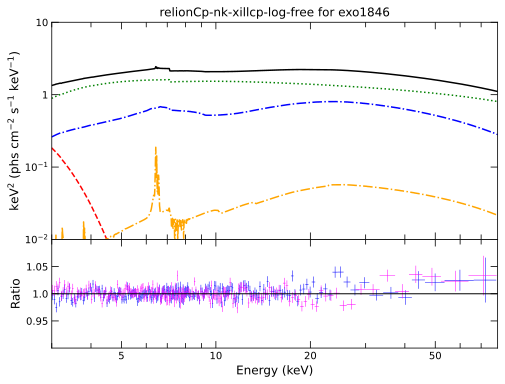

In [9]:
#plot a single file
# plot_eemod_ra_single_file('exo1846_relionCp-nk_pl_eemod_ra.txt',x_max=79.0)
# plot_eemod_ra_single_file('exo1846_relionCp-nk-two-br_pl-eemod-ra.txt',x_max=79.0)
# plot_eemod_ra_single_file('exo1846_relionCp-nk-xillcp_logxi-0_pl-eemod-ra.txt',x_max=79.0)
plot_eemod_ra_single_file('exo1846_relionCp-nk-xillcp-log-free_pl-eemod-ra.txt',x_max=79)
# plot_eemod_ra_single_file('GRS 1915+105_Model1A_relcp_pl-eemod-ra.txt',prop=0.5)

/var/folders/p4/k2mn1bys7kj2_sc0401cf08h0000gn/T/ipykernel_45609/2497379734.py:135: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax[1].errorbar(x=data[0], y=data[2], xerr=data[1], yerr=data[3], marker='o', fmt='o', color='black',ms=0.0,
/var/folders/p4/k2mn1bys7kj2_sc0401cf08h0000gn/T/ipykernel_45609/2497379734.py:135: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax[1].errorbar(x=data[0], y=data[2], xerr=data[1], yerr=data[3], marker='o', fmt='o', color='black',ms=0.0,
/var/folders/p4/k2mn1bys7kj2_sc0401cf08h0000gn/T/ipykernel_45609/2497379734.py:135: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax[1].errorbar(x=data[0], y=data[2], xerr=data[1]

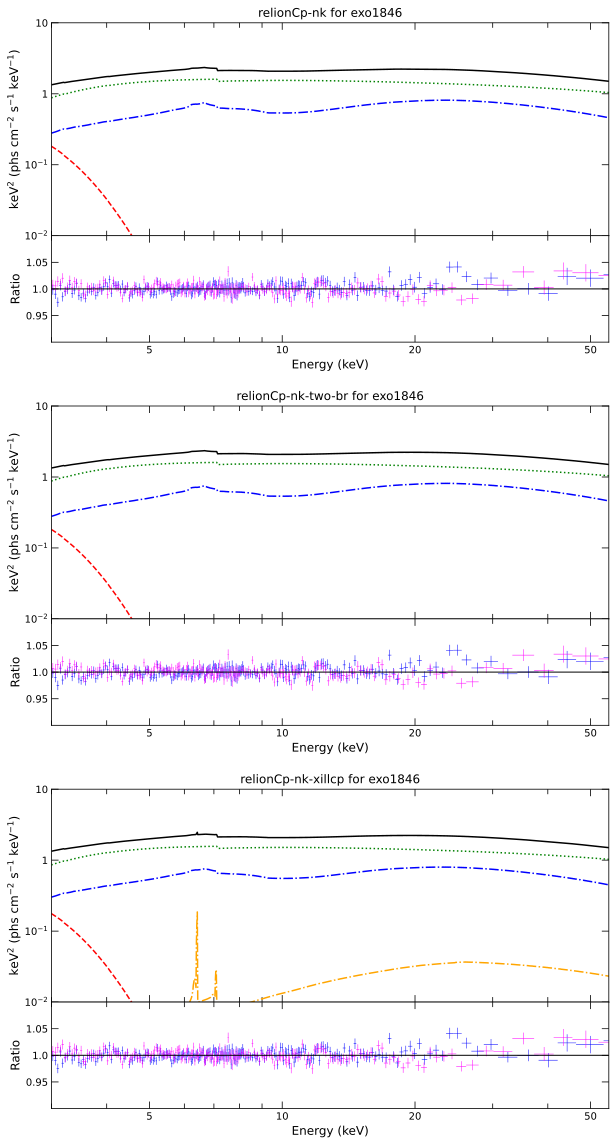

In [6]:
# plot for all files and save as a pdf file
#define some parameters:
fig_aspect = (10,20) #the first number is the width(横向), the second is the length(纵向).
widths = [8]
heights = [3,3,3]
gridspec_aspect = (3,1) #the first is the number of raws, the second is the number of columns

#define for each subplot
fig = plt.figure(figsize=fig_aspect)
spec = gridspec.GridSpec(gridspec_aspect[0],gridspec_aspect[1],
                         width_ratios=widths,height_ratios=heights)

#define gs grid points and axes in gs
names = locals()
for i in range(gridspec_aspect[0]):
    for j in range(gridspec_aspect[1]):
        #跳过不放图的格子:
        #例如跳过格子(3,0)
        if (i, j) in [(3,0)]:
                continue
        #生成子图
        names['gs'+str(i)+str(j)] = gridspec.GridSpecFromSubplotSpec(2, 1, 
                                                    subplot_spec=spec[i,j],
                                                    height_ratios=[4, 2],
                                                    hspace=0.0)
        names['ax'+str(i)+str(j)] = [None]*2 
        names['ax'+str(i)+str(j)][0] = plt.subplot(names['gs'+str(i)+str(j)][0])
        names['ax'+str(i)+str(j)][1] = plt.subplot(names['gs'+str(i)+str(j)][1])
        
# plot each subplot axes:
# 文件名命名规则:辐射源编号(GRS 1915+105)+'_'+模型编号(Model1A)
# do_something2ax(ax00,'GRS 1915+105_Model1A_relcp_pl-eemod-ra.txt')
# do_something2ax(ax01,'GRS 1915+105_Model2A_relcon-xill_pl-eemod-ra.txt')
# do_something2ax(ax10,'GRS 1915+105_Model1B_simp-relcp_pl-eemod-ra.txt')
# do_something2ax(ax11,'GRS 1915+105_Model2B_simp-relcon-xill_pl-eemod-ra.txt')
# do_something2ax(ax20,'GRS 1915+105_Model1B-prime_simp_disk+mbk-relcp_pl-eemod-ra.txt')
# do_something2ax(ax21,'GRS 1915+105_Model2B-prime_simp_disk+mbk-relcon-xill_pl-eemod-ra.txt')
# do_something2ax(ax31,'GRS 1915+105_Model2C_relcon-simp-xill_pl-eemod-ra.txt')
do_something2ax(ax00,'exo1846_relionCp-nk_pl_eemod_ra.txt')
do_something2ax(ax10,'exo1846_relionCp-nk-two-br_pl-eemod-ra.txt')
do_something2ax(ax20,'exo1846_relionCp-nk-xillcp_logxi-0_pl-eemod-ra.txt')



#save as pdf file:
# fig.tight_layout() 
fig.savefig('exo1846_pl_eemod_ra.pdf')